 # Comic-GAN Training Data Preparation

## Imports and headers

In [36]:
%matplotlib inline

import animeface as af
import numpy as np

import PIL.Image
import os
import cv2 
import glob

import matplotlib.pyplot as plt
from icrawler.builtin import GreedyImageCrawler

In [34]:
# Parameters used to control the crawler
feeder_thread_num = 12
parser_thread_num = 12
downloader_thread_num = 22
image_folder_path = os.getcwd() + '/images'
data_folder_path = os.getcwd() + '/data'
domain_name = 'http://danbooru.donmai.us'
max_image_num = 100000
min_image_size = (200, 200)
max_image_size = (2048,2048)

## Image crawler

In [ ]:
# Crawler used to collect images
# Using the greedy crawler
greedy_crawler = GreedyImageCrawler(
                    feeder_threads=feeder_thread_num,
                    parser_threads=parser_thread_num,
                    downloader_threads=downloader_thread_num,
                    storage={'root_dir': image_folder_path})

greedy_crawler.crawl(domains=domain_name, max_num=max_image_num,
                     min_size=min_image_size, max_size=max_image_size)

## Experimental data process

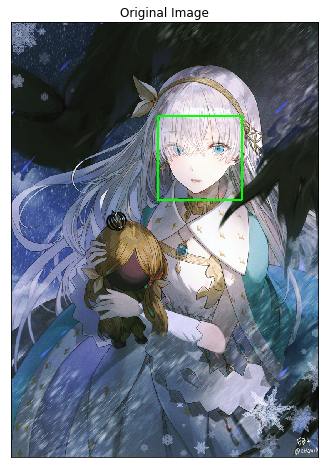

In [17]:
# Sample data preparation 
# using Animeface {@https://github.com/nya3jp/python-animeface}

image = PIL.Image.open(image_folder_path + '/000005.png')
faces = af.detect(image)

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for face in faces:
    fp = face.face.pos
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (fp.x,fp.y), (fp.x+fp.width,fp.y+fp.height), (0,255,0), 3)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Detected Image')
ax1.imshow(image_with_detections)

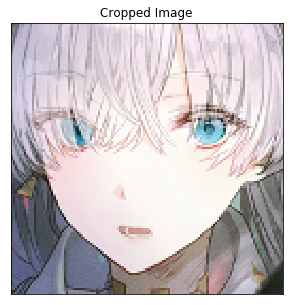

In [32]:
# Make a copy of the orginal image to draw face detections on
image_cp = np.copy(image)

# Get the bounding box for each detected face
for face in faces:
    fp = face.face.pos
    
    # Crop the face from the gray scale image
    face_cropped = image_cp[fp.y: fp.y + fp.height, fp.x: fp.x + fp.width]
    
    # Resize the image to match 128 x 128 input
    face_resized = cv2.resize(face_cropped, (128,128), interpolation = cv2.INTER_CUBIC)
    
    # Plot our image using subplots to specify a size and title
    fig = plt.figure(figsize = (5,5))
    ax1 = fig.add_subplot(111)
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax1.set_title('Cropped Image')
    ax1.imshow(face_resized)
    
    # Store the resized image
    face_resized = PIL.Image.fromarray(face_resized)
    face_resized.save(image_folder_path + '/test_001.jpg')


## Data processing

In [ ]:
# Start to process all the images. Following are the steps:
#   1. Detect anime faces
#   2. Crop and resize the detected faces
#   3. Save the new image
#   4. Delete the original image
image_type = [".jpg", ".png"]

if(os.path.isdir(image_folder_path)):
    image_list = []
    image_index = 1
    count = 0
    
    # Retrive all items from the folder
    for type in image_type:
        image_list.extend(glob.glob(image_folder_path + "/*" + type))
    
    # Start to process the images
    for image_path in image_list:
        print('Processing image ' + image_path[-10:])
        
        try:
            # Load the image
            image = PIL.Image.open(image_path)
            # Detect anime faces
            faces = af.detect(image)
            # Make a copy of the orginal image to draw face detections on
            image_cp = np.copy(image)

            for face_model in faces:
                # Retrieve the bonding box positions
                fp = face_model.face.pos
                # Crop the face
                face_cropped = image_cp[fp.y: fp.y + fp.height, fp.x: fp.x + fp.width]
                # Resize the image to match 128 x 128 input
                face_resized = cv2.resize(face_cropped, (128,128), interpolation = cv2.INTER_CUBIC)
                # Store the resized image
                face_resized = PIL.Image.fromarray(face_resized)
                face_resized.save(image_folder_path + '/img_' + str(image_index) + image_path[-4:])
                # Increase the index
                image_index += 1
         
            # Delete the original image
            os.remove(image_path)
        except (IOError, OSError, ValueError):  ## if failed, report it back to the user ##
            try:
                # Delete the original image
                os.remove(image_path)
            except OSError:
                pass
            pass